# ACCRE Project - Question 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from datetime import datetime, timedelta
import statistics

In [2]:
# Read in fullsample_cleaned.csv as a dataframe
jobs = pd.read_csv("../data/fullsample_cleaned.csv")

In [3]:
# Convert BEGIN and END columns in jobs df to datetime type
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'])
jobs['END'] = pd.to_datetime(jobs['END'])

# Convert REQTIME, USEDTIME, JOBLENGTH columns in jobs df to timedelta type
jobs['REQTIME'] = pd.to_timedelta(jobs['REQTIME'])
jobs['USEDTIME'] = pd.to_timedelta(jobs['USEDTIME'])
jobs['JOBLENGTH'] = pd.to_timedelta(jobs['JOBLENGTH']).astype('timedelta64[s]')

# Count the amount of jobs per hour and create new column
jobs['GROUP1H'] = jobs.groupby(pd.Grouper(key='END',freq='H')).transform('count')['JOBID'].sort_index()

# Extract date and hour from 'END' column
jobs['DATE'] = jobs['END'].dt.date
jobs['YEAR'] = jobs['END'].dt.year
jobs['WEEK'] = jobs['END'].dt.isocalendar().week
jobs['HOUR'] = jobs['END'].dt.hour

# Create data frame with duplicates dropped by 'DATE' and 'HOUR' column
one_job_per_hour = jobs.drop_duplicates(['DATE', 'HOUR'])

## Question 1: Calculate some descriptive statistics for how many jobs per hour are being completed.

In [4]:
# Set fontsize
fontsize = 30

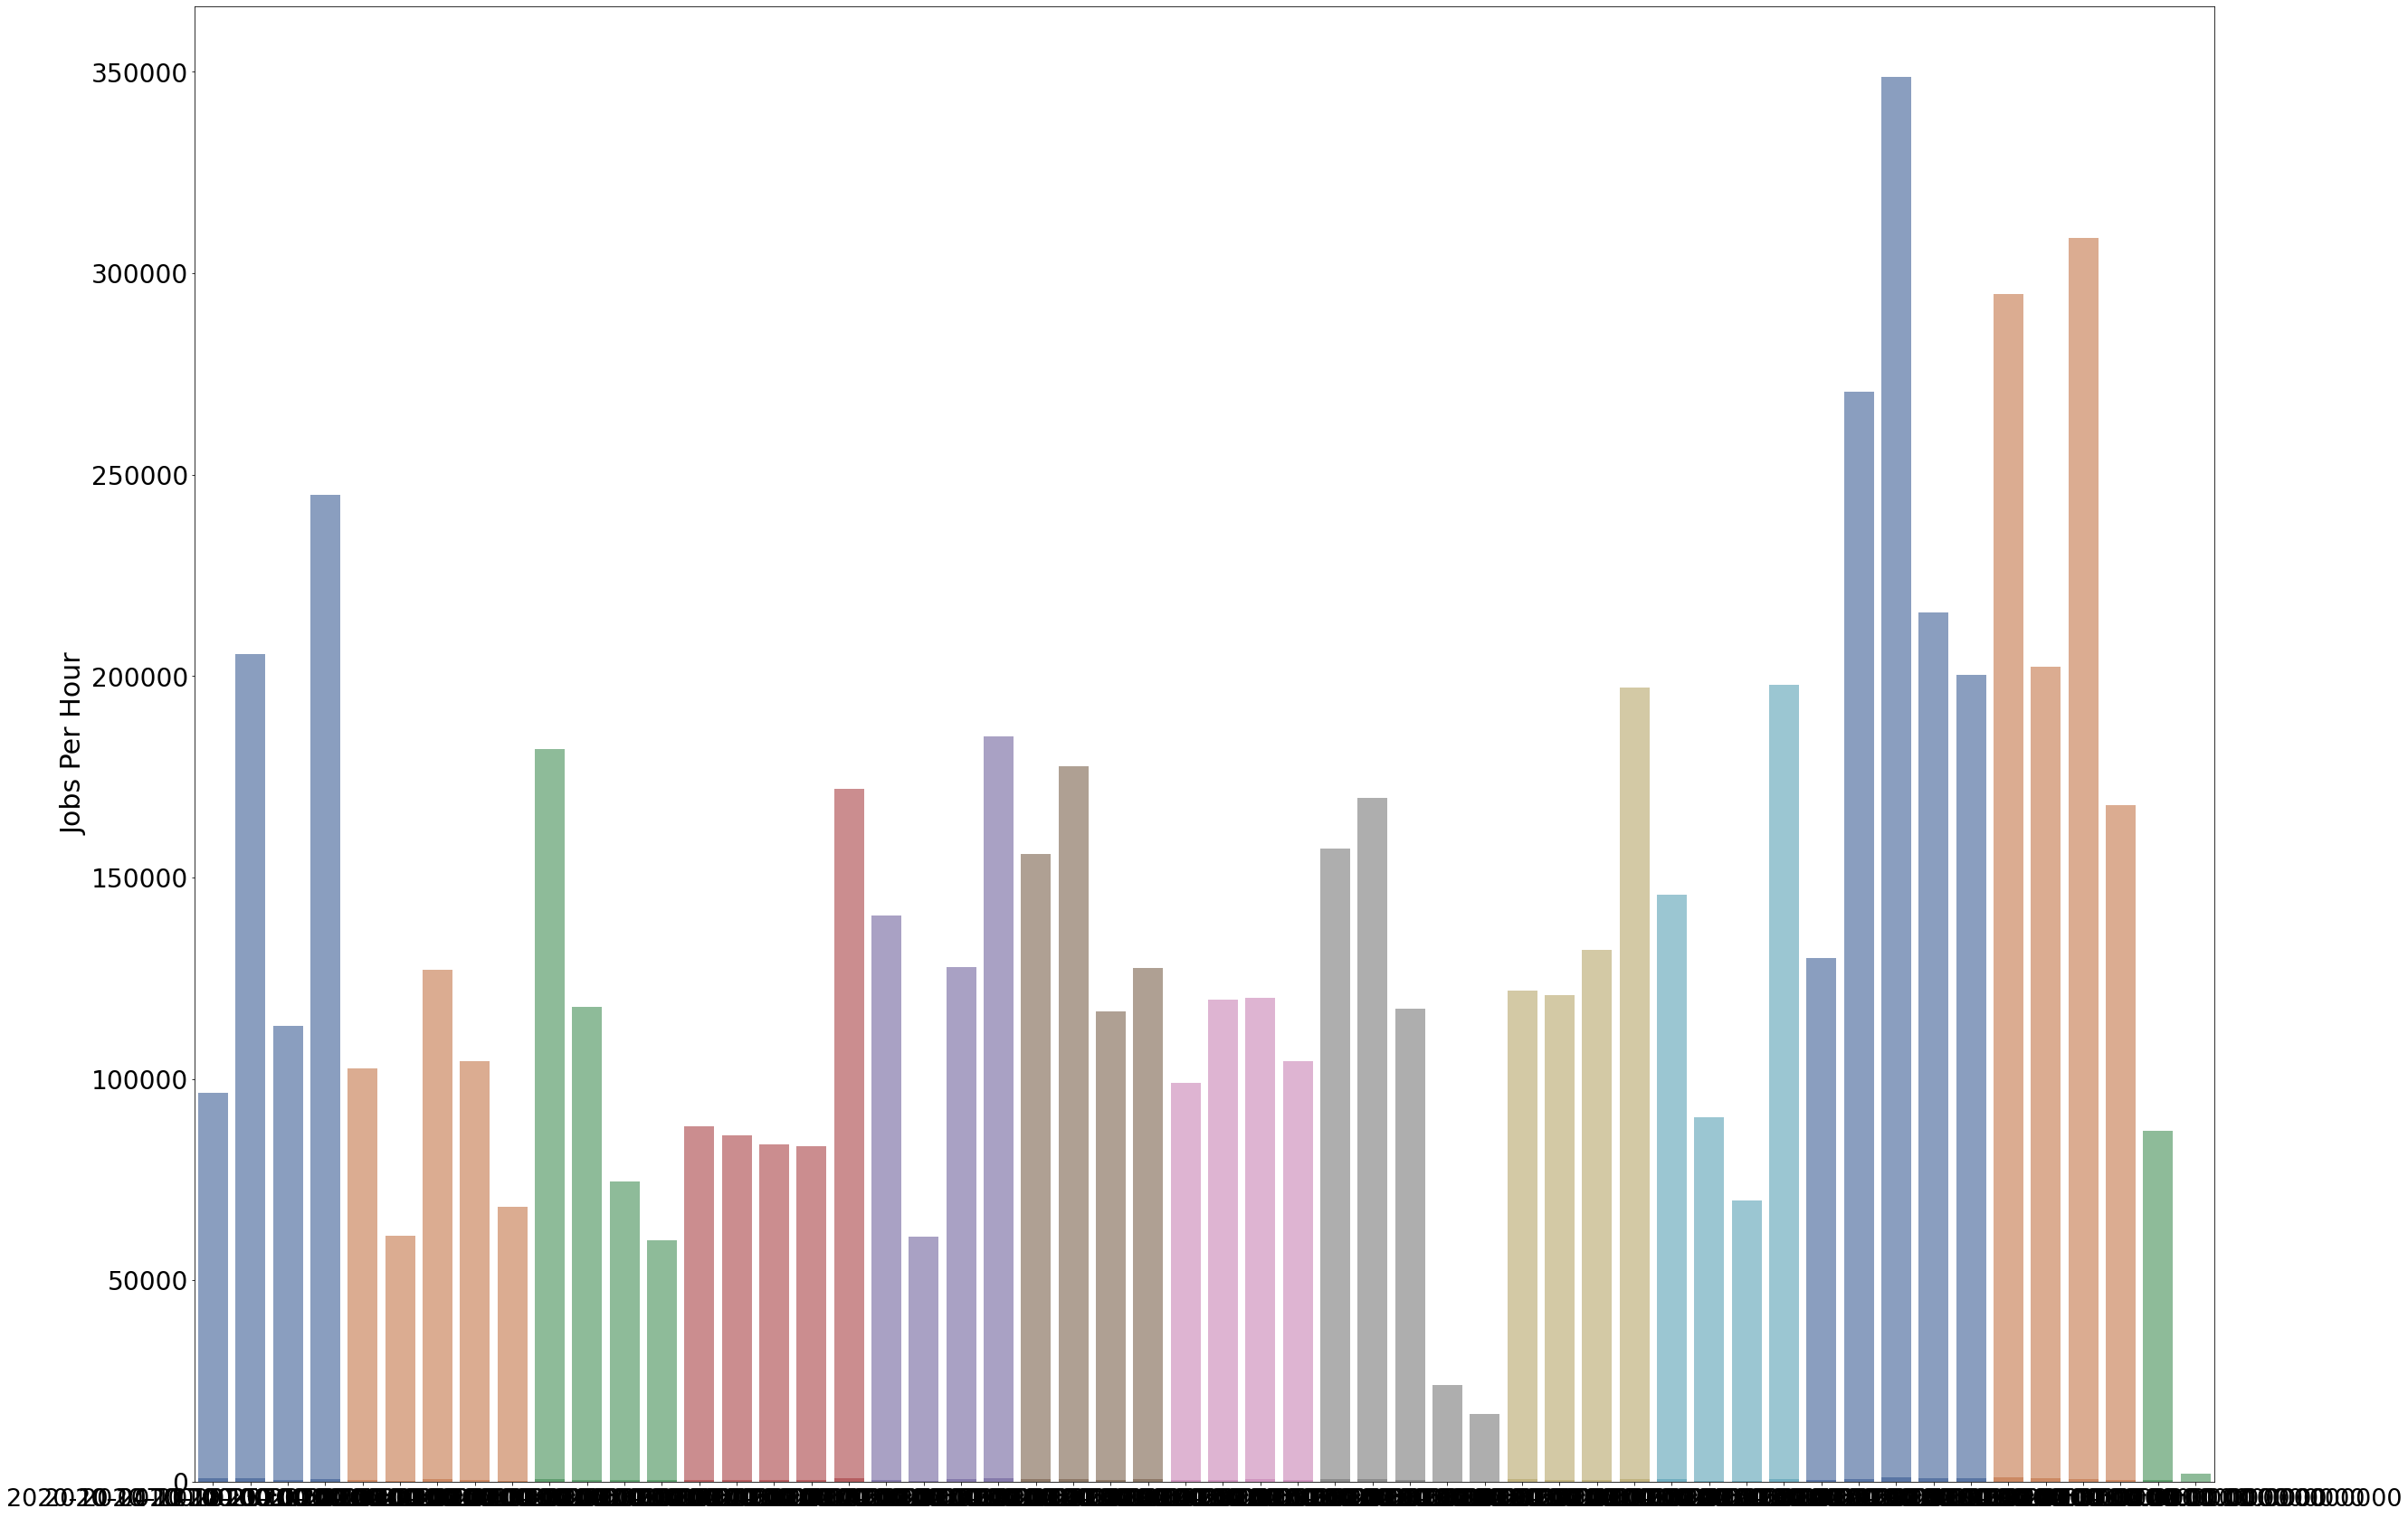

In [5]:
# Median jobs ended per hour each week
weekly_jobs_ended_by_hour_median = one_job_per_hour.groupby(pd.Grouper(key='END',freq='W')).median()
weekly_jobs_ended_by_hour_median = weekly_jobs_ended_by_hour_median.reset_index()

# Average(mean) jobs ended per hour each week
weekly_jobs_ended_by_hour_mean = jobs.groupby(pd.Grouper(key='END',freq='W')).count()
weekly_jobs_ended_by_hour_mean = weekly_jobs_ended_by_hour_mean.reset_index()

# Format date ticks for x axis
date_labels = weekly_jobs_ended_by_hour_median['END'].dt.strftime('%Y-%m')

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(40, 30))
sns.barplot(x = 'END', 
            y = 'GROUP1H', 
            data = weekly_jobs_ended_by_hour_median, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax)
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = weekly_jobs_ended_by_hour_mean, 
            hue = date_labels, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)

# Set Axes labels and sizes
# ax.set_xticklabels(["             October '20", "", "", "", "", "", "November", "", "", "", "     December", "", "", "", "", 
#                     "January '21", "", "", "", "     February", "", "", "", "   March", "", "", "", "     April", "", "", 
#                     "", "", "May", "", "", "", "     June", "", "", "", "      July", "", "", "", "", "August", "", "", "", 
#                     "    September", "", "", "", "October"])
plt.xlabel('', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 3, rotation = 0)

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

ax.get_legend().set_visible(False);

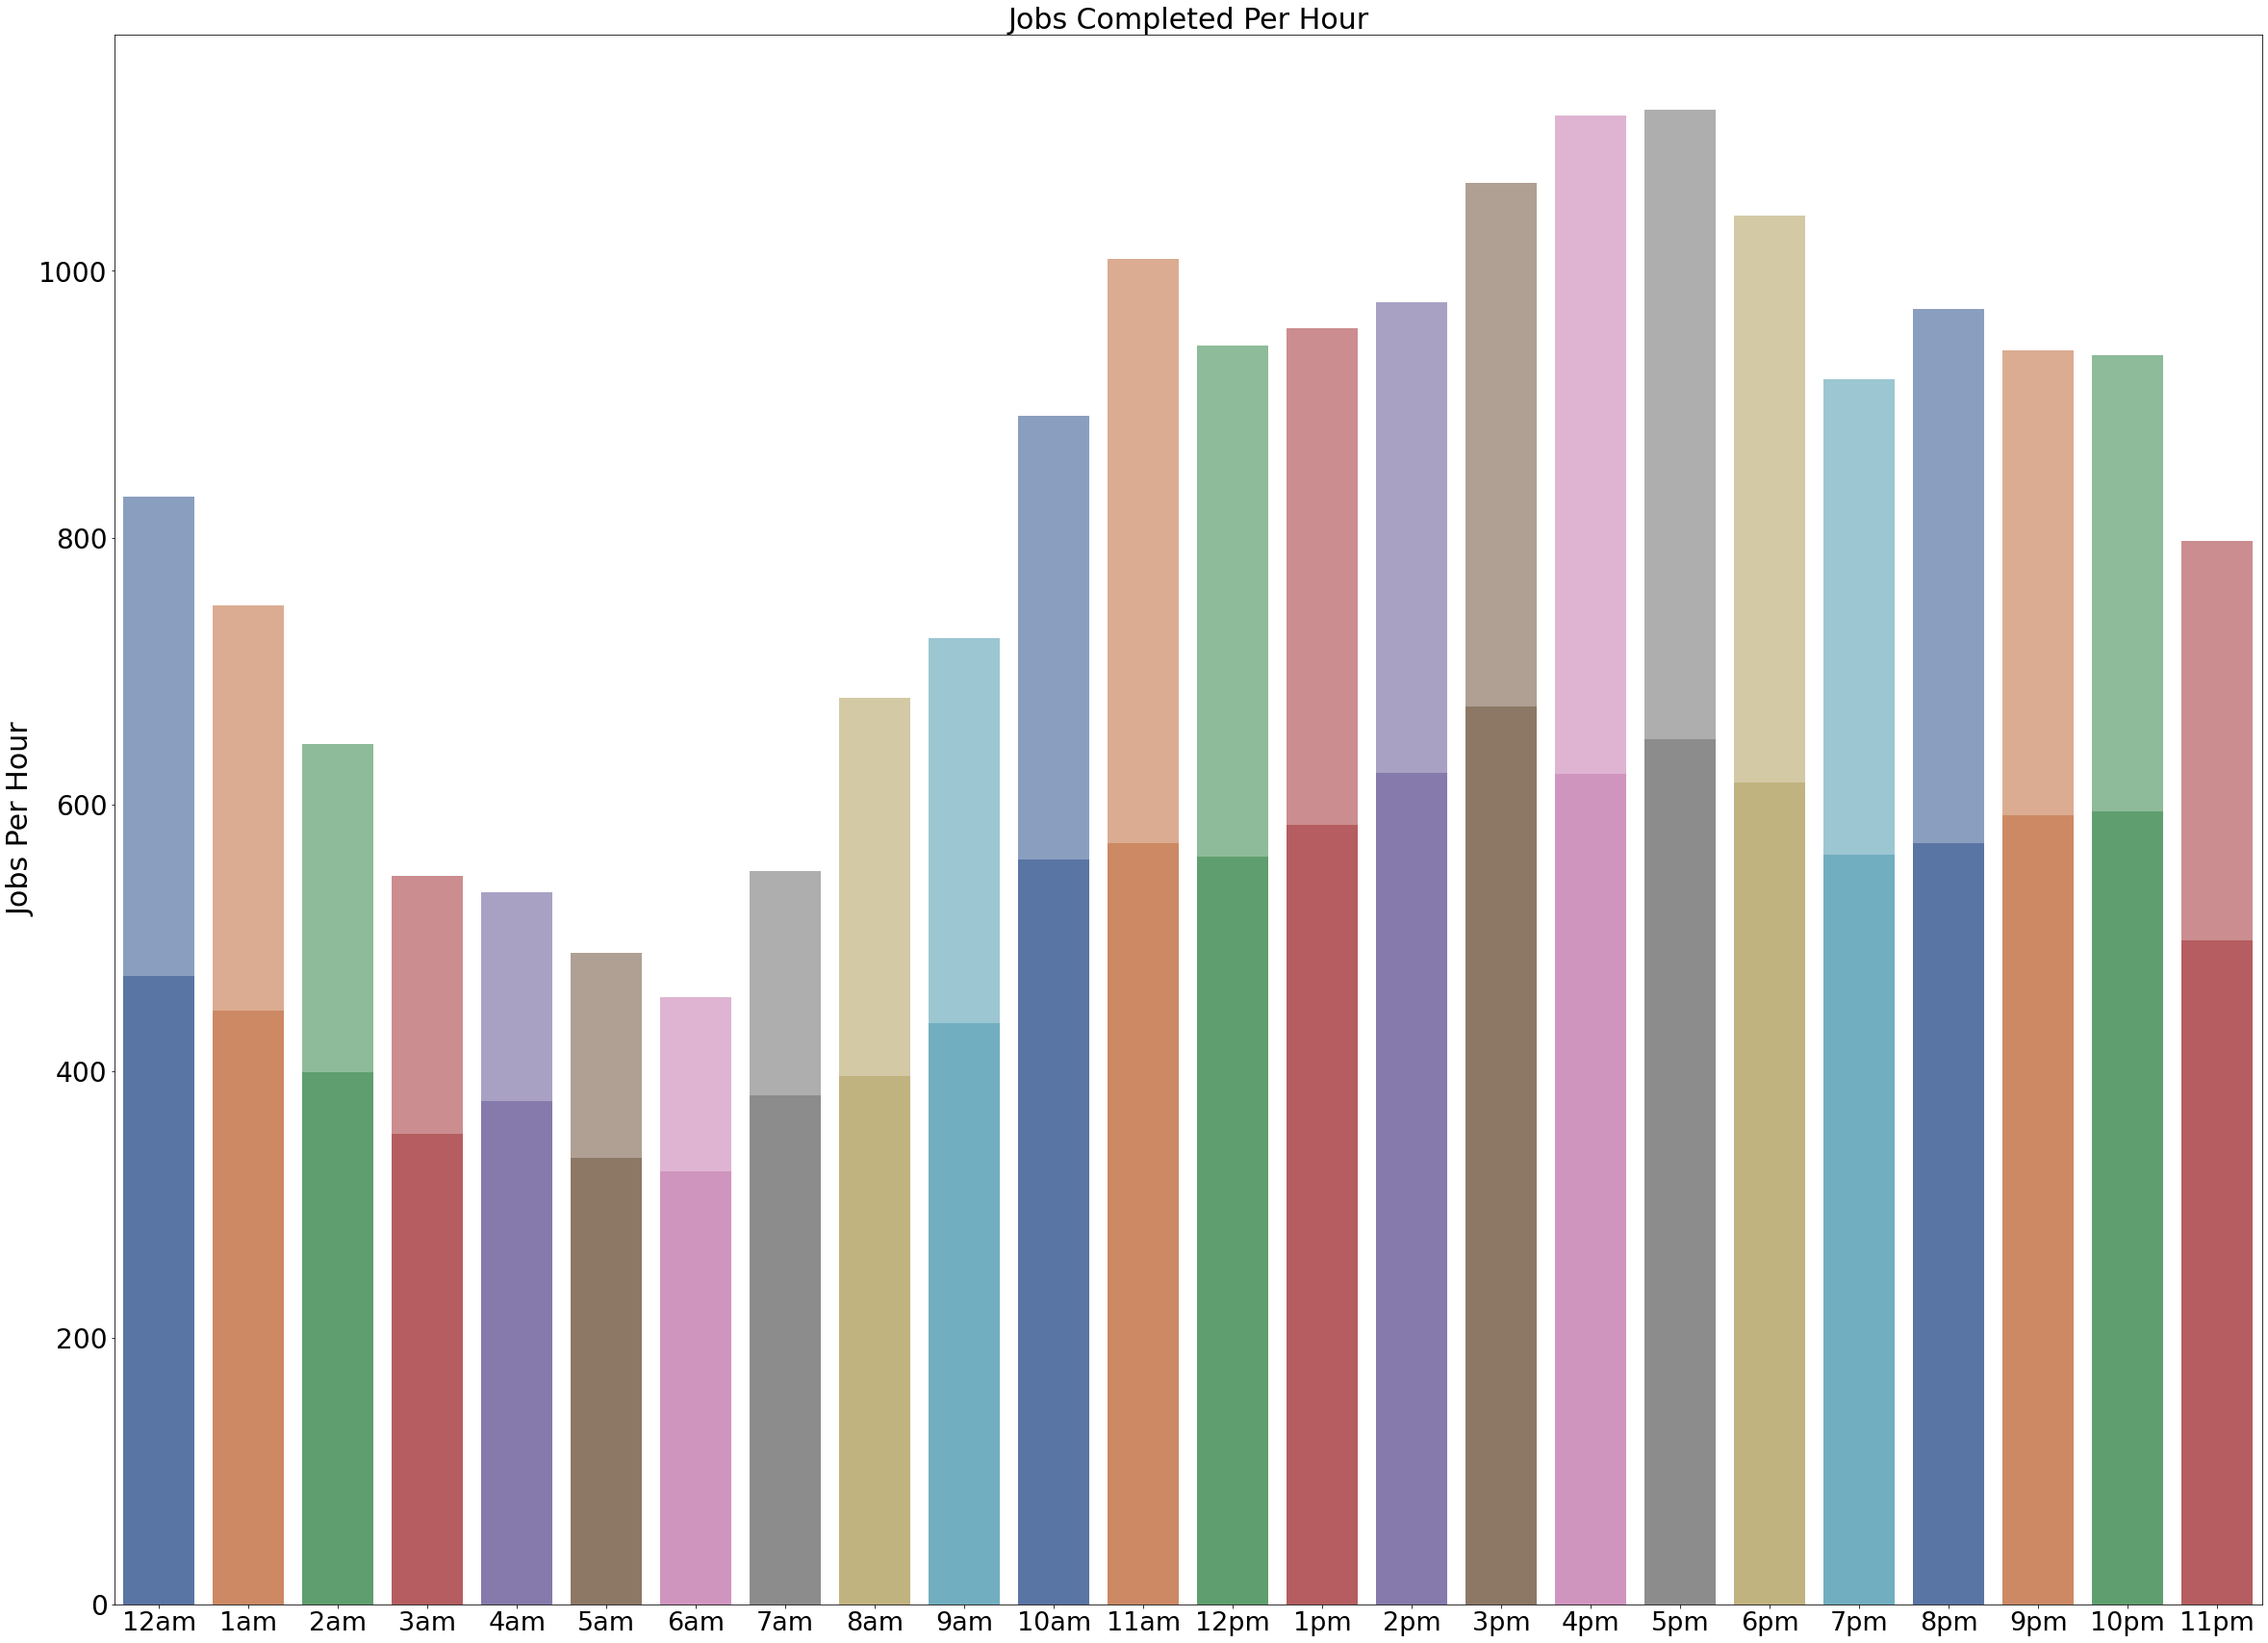

In [6]:
# Median jobs ended per hour each week
jobs_ended_by_hour_median = one_job_per_hour.groupby('HOUR').median()
jobs_ended_by_hour_median = jobs_ended_by_hour_median.reset_index()

# Average(mean) jobs ended per hour each week
jobs_ended_by_hour_mean = one_job_per_hour.groupby('HOUR').mean()
jobs_ended_by_hour_mean = jobs_ended_by_hour_mean.reset_index()

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(40, 30))
sns.barplot(x = 'HOUR', 
            y = 'GROUP1H', 
            data = jobs_ended_by_hour_median, 
            dodge = False, 
            palette = "deep",
            ax = ax)
sns.barplot(x = 'HOUR', 
            y = 'GROUP1H', 
            data = jobs_ended_by_hour_mean, 
            dodge = False, 
            palette = "deep",
            ax = ax,
            alpha = 0.7)

# Set Axes labels and sizes
plt.xlabel('', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 3, rotation = 0)
ax.set_xticklabels(labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', 
                             '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'])

plt.ylabel('Jobs Per Hour', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title("Jobs Completed Per Hour", fontsize = fontsize);

In [7]:
pd.to_timedelta(jobs.groupby(['YEAR', 'WEEK', 'HOUR'])['JOBLENGTH'].max(), unit = 'S').max()

Timedelta('34 days 23:15:05')

In [8]:
pd.to_timedelta(jobs.groupby(['YEAR', 'WEEK', 'HOUR'])['JOBLENGTH'].min(), unit = 'S').min()

Timedelta('-1 days +23:02:54')

In [9]:
pd.to_timedelta(jobs.groupby(['YEAR', 'WEEK', 'HOUR'])['JOBLENGTH'].mean(), unit = 'S').mean()

Timedelta('0 days 05:54:04.935311754')

In [10]:
pd.to_timedelta(jobs.groupby(['YEAR', 'WEEK', 'HOUR'])['JOBLENGTH'].median(), unit = 'S').median()

Timedelta('0 days 00:26:35')

In [11]:
pd.to_timedelta(jobs.groupby(['YEAR', 'WEEK', 'HOUR'])['JOBLENGTH'].std(), unit = 'S').std()

Timedelta('0 days 06:44:50.414461337')

In [12]:
jobs['JOBLENGTH']

0          2592023.0
1          2592014.0
2          2520004.0
3          2106017.0
4          1758747.0
             ...    
7395229        106.0
7395230         85.0
7395231        194.0
7395232        116.0
7395233        188.0
Name: JOBLENGTH, Length: 7395234, dtype: float64

In [13]:
print(pd.to_timedelta(jobs['JOBLENGTH'], unit = 'S').max())
print(pd.to_timedelta(jobs['JOBLENGTH'], unit = 'S').min())
print(pd.to_timedelta(jobs['JOBLENGTH'], unit = 'S').mean())
print(pd.to_timedelta(jobs['JOBLENGTH'], unit = 'S').median())
print(pd.to_timedelta(jobs['JOBLENGTH'], unit = 'S').std())

34 days 23:15:05
-1 days +23:02:54
0 days 03:48:03.920357488
0 days 00:13:54
0 days 12:44:51.141935498


In [14]:
jobs[jobs['JOBLENGTH'] < 0]

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,...,EXITCODE,JOBLENGTH,REQMEMTOT,REQMEMPERCORE,USEDMEMTOT,GROUP1H,DATE,YEAR,WEEK,HOUR
6246271,25396658_3375,COMPLETED,2020-11-01 01:47:26,2020-11-01 01:05:39,10240Mn,7970.39M,-30 days +20:00:00,0 days 00:18:13,1,8,...,0:0,-2507.0,10240.0,1280.000000,7970.0,526,2020-11-01,2020,44,1
6246273,25396658_3377,COMPLETED,2020-11-01 01:47:26,2020-11-01 01:01:42,10240Mn,5750.29M,-30 days +20:00:00,0 days 00:14:16,1,8,...,0:0,-2744.0,10240.0,1280.000000,5750.0,526,2020-11-01,2020,44,1
6246276,25396658_3380,COMPLETED,2020-11-01 01:56:44,2020-11-01 01:20:22,10240Mn,7840.99M,-30 days +20:00:00,0 days 00:23:38,1,8,...,0:0,-2182.0,10240.0,1280.000000,7840.0,526,2020-11-01,2020,44,1
6252273,25448710_2773,COMPLETED,2020-11-01 01:34:28,2020-11-01 01:00:46,10240Mn,1424.66M,0 days 03:00:00,0 days 00:26:18,1,1,...,0:0,-2022.0,10240.0,10240.000000,1424.0,526,2020-11-01,2020,44,1
6252274,25448710_2774,COMPLETED,2020-11-01 01:38:54,2020-11-01 01:04:39,10240Mn,1546.48M,0 days 03:00:00,0 days 00:25:45,1,1,...,0:0,-2055.0,10240.0,10240.000000,1546.0,526,2020-11-01,2020,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6256475,25493874,FAILED,2020-11-01 01:57:09,2020-11-01 01:18:22,42994Mn,8.40M,-9 days +16:00:00,0 days 00:21:13,1,12,...,1:0,-2327.0,42994.0,3582.833333,8.0,526,2020-11-01,2020,44,1
6256563,25494314,FAILED,2020-11-01 01:38:54,2020-11-01 01:17:42,5000Mn,4892.30M,-9 days +16:00:00,0 days 00:38:48,1,1,...,0:9,-1272.0,5000.0,5000.000000,4892.0,526,2020-11-01,2020,44,1
6256564,25494322,FAILED,2020-11-01 01:37:07,2020-11-01 01:02:01,61440Mn,46729.76M,-42 days +08:00:00,0 days 00:24:54,1,3,...,0:9,-2106.0,61440.0,20480.000000,46729.0,526,2020-11-01,2020,44,1
6256579,25494499,FAILED,2020-11-01 01:49:02,2020-11-01 01:35:37,5000Mn,4374.93M,-9 days +16:00:00,0 days 00:46:35,1,1,...,0:9,-805.0,5000.0,5000.000000,4374.0,526,2020-11-01,2020,44,1


# Appendix (Material That Didn't Make the Presentation)

<ipython-input-15-eb224557cb0b>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "50K", "100K", "150K", "200K", '250K', '300K', '350K', '400K'])


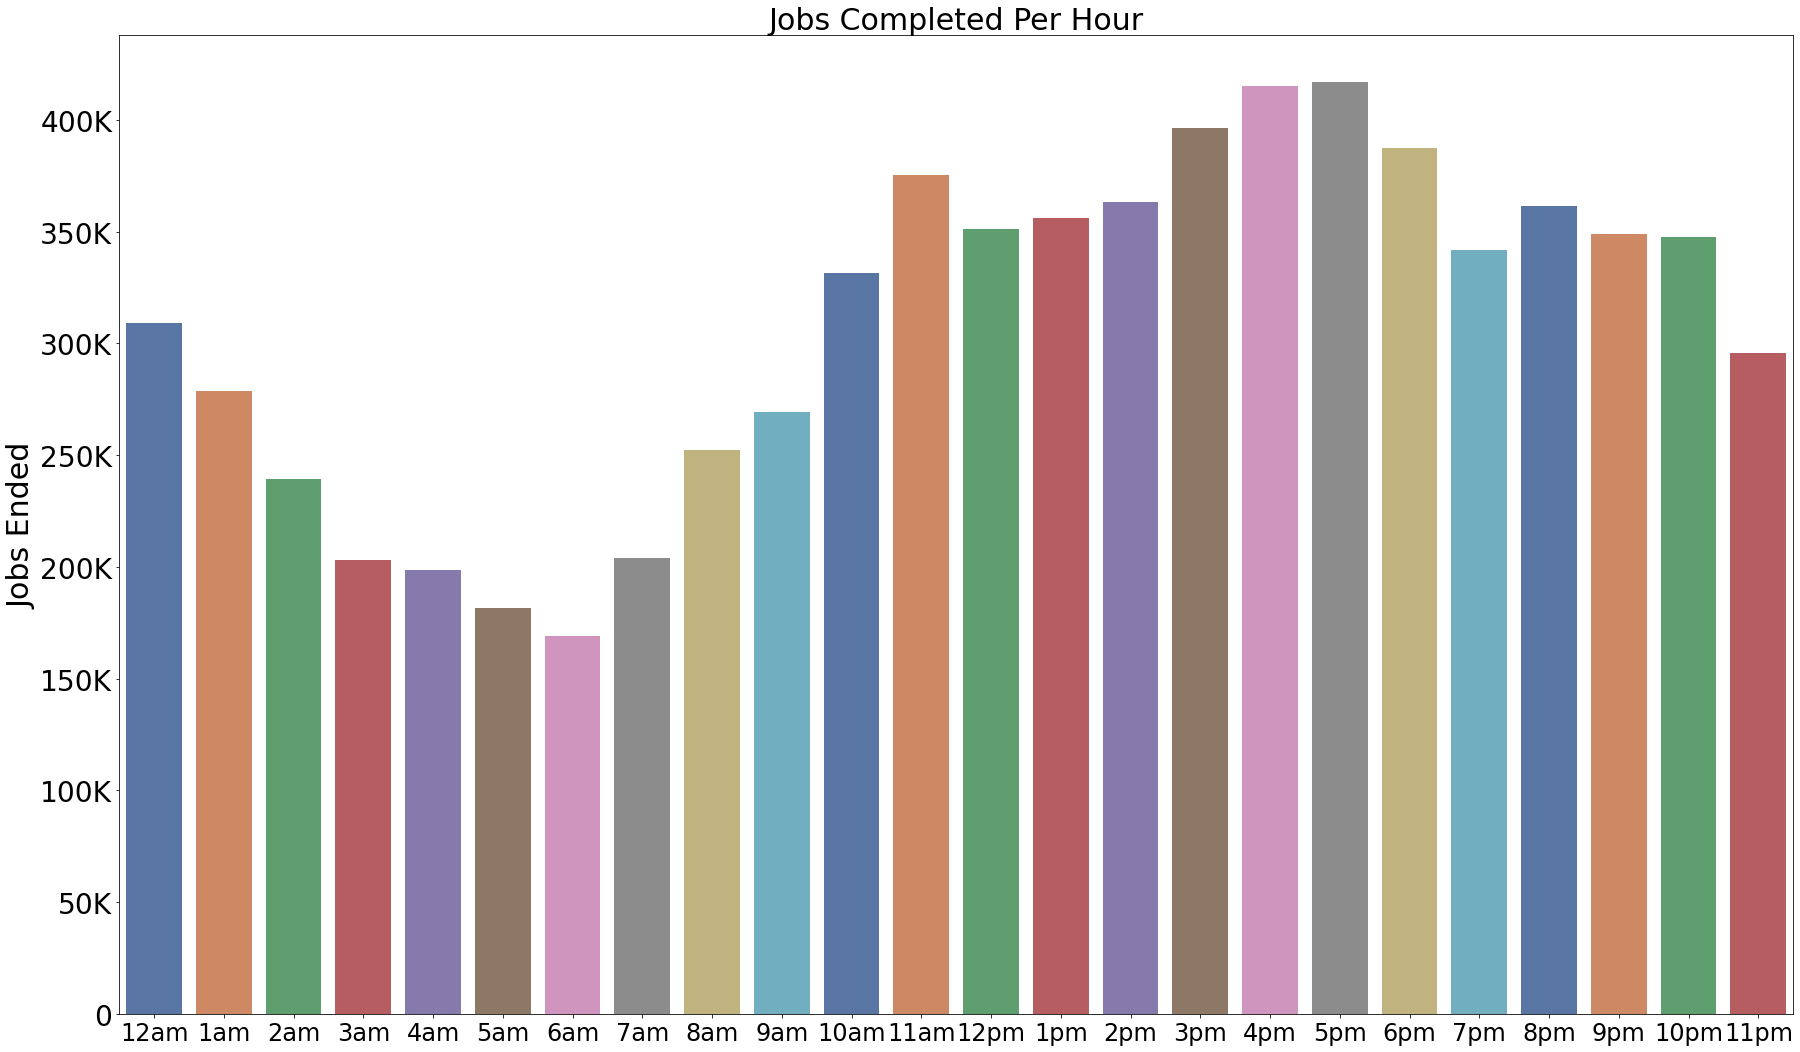

In [15]:
# Average(mean) jobs ended per hour for the third week in September
total_jobs_ended_by_hour = jobs.groupby(jobs['END'].dt.hour).count().drop({'END'}, axis='columns')
total_jobs_ended_by_hour = total_jobs_ended_by_hour.reset_index()

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = total_jobs_ended_by_hour, 
            dodge = False, 
            palette = "deep",
            ax = ax)

# Set Axes labels and sizes
date_labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
plt.xlabel('', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 6, rotation = 0)
ax.set_xticklabels(labels = date_labels)

plt.ylabel('Jobs Ended', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)
ax.set_yticklabels(["0", "50K", "100K", "150K", "200K", '250K', '300K', '350K', '400K'])


plt.title("Jobs Completed Per Hour", fontsize = fontsize);

<ipython-input-16-1710bc36383a>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["0", "10K", "20K", "30K", "40K"])


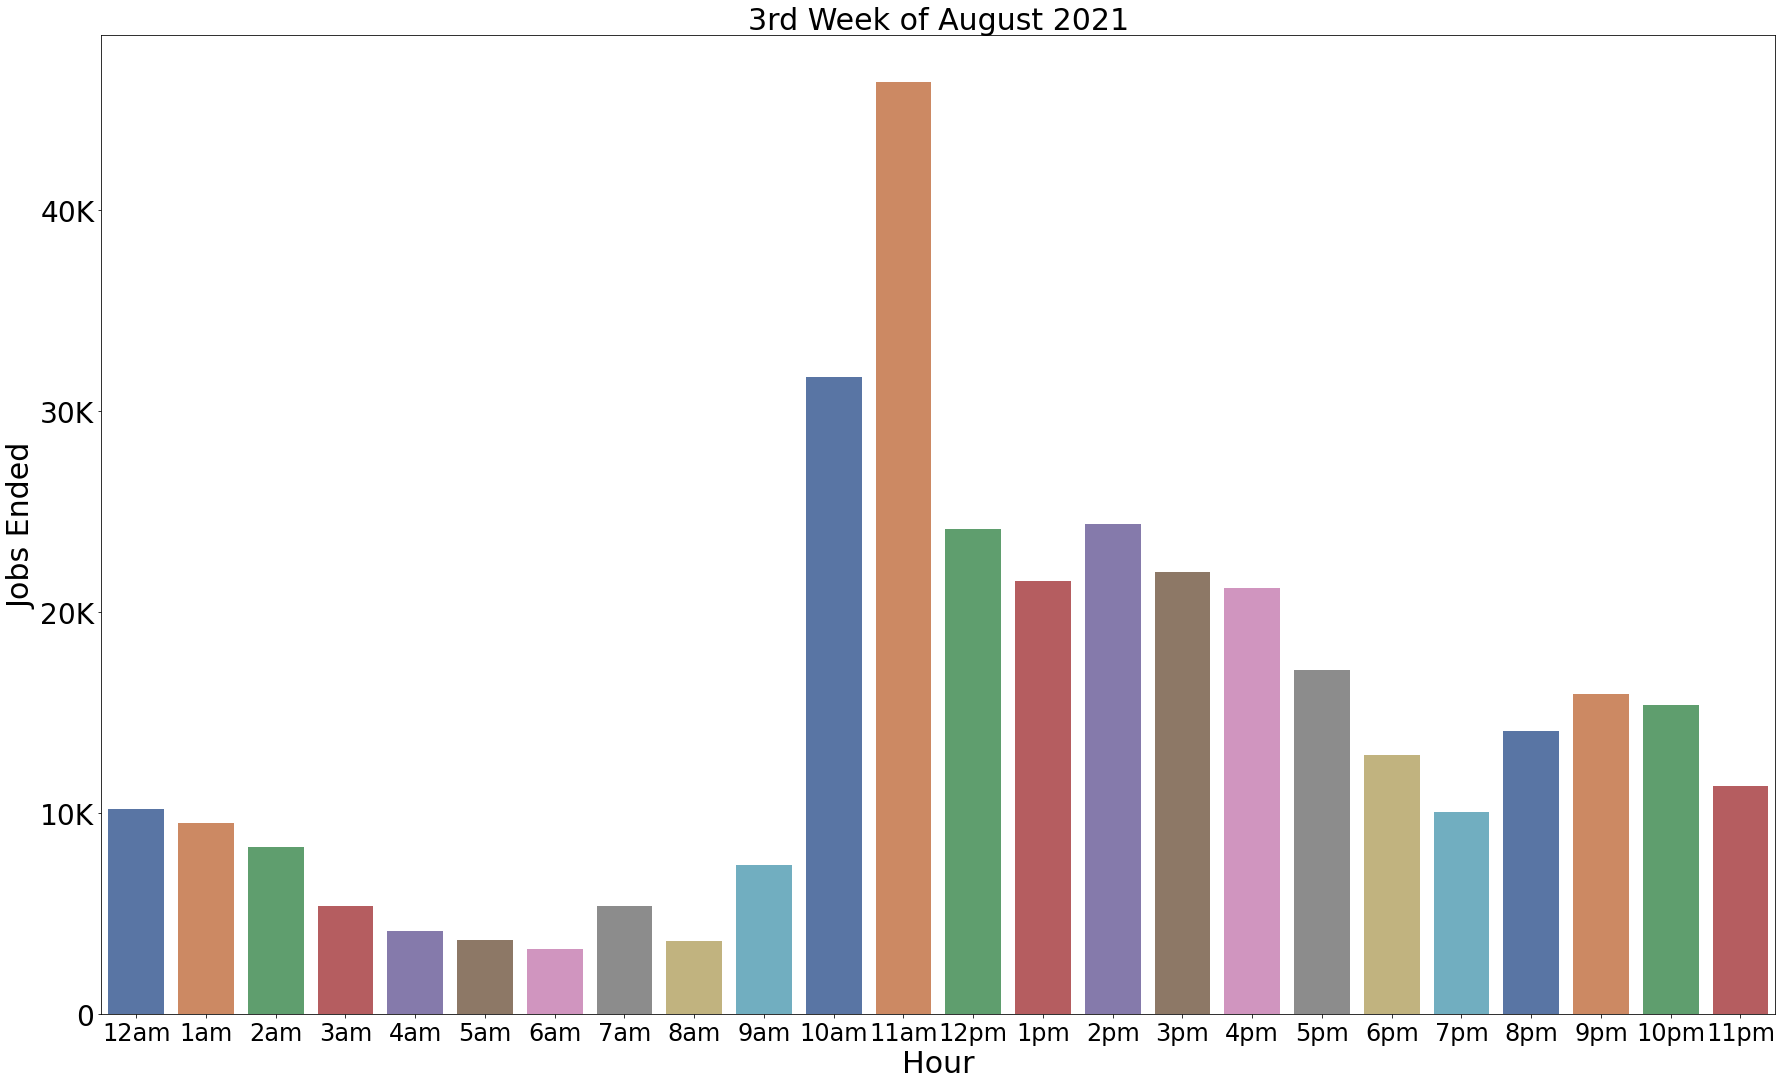

In [16]:
# Extract data for the third week of August
third_week_august = jobs[(jobs['END'].dt.date >= pd.to_datetime('2021-08-09')) 
                            & (jobs['END'].dt.date < pd.to_datetime('2021-08-16'))]

# Average(mean) jobs ended per hour for the third week in September
third_week_august_jobs_ended_by_hour = third_week_august.groupby(jobs['END'].dt.hour).count().drop({'END'}, axis='columns')
third_week_august_jobs_ended_by_hour = third_week_august_jobs_ended_by_hour.reset_index()

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
sns.barplot(x = 'END', 
            y = 'JOBID', 
            data = third_week_august_jobs_ended_by_hour, 
            dodge = False, 
            palette = "deep",
            ax = ax)

# Set Axes labels and sizes
plt.xlabel('Hour', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 6, rotation = 0)
ax.set_xticklabels(labels = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', 
                             '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'])

plt.ylabel('Jobs Ended', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)
ax.set_yticklabels(["0", "10K", "20K", "30K", "40K"])

plt.title("3rd Week of August 2021", fontsize = fontsize);

In [17]:
# Modify states cancelled by certain users to just say cancelled
third_week_august.loc[third_week_august['STATE'].str.find('CANCELLED') == 0, 'STATE'] = 'CANCELLED'

# Extract data for only jobs completed during 11am during thrid week of August
third_week_august_11_am = third_week_august[third_week_august['HOUR'] == 11]

C:\Users\hjrko\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


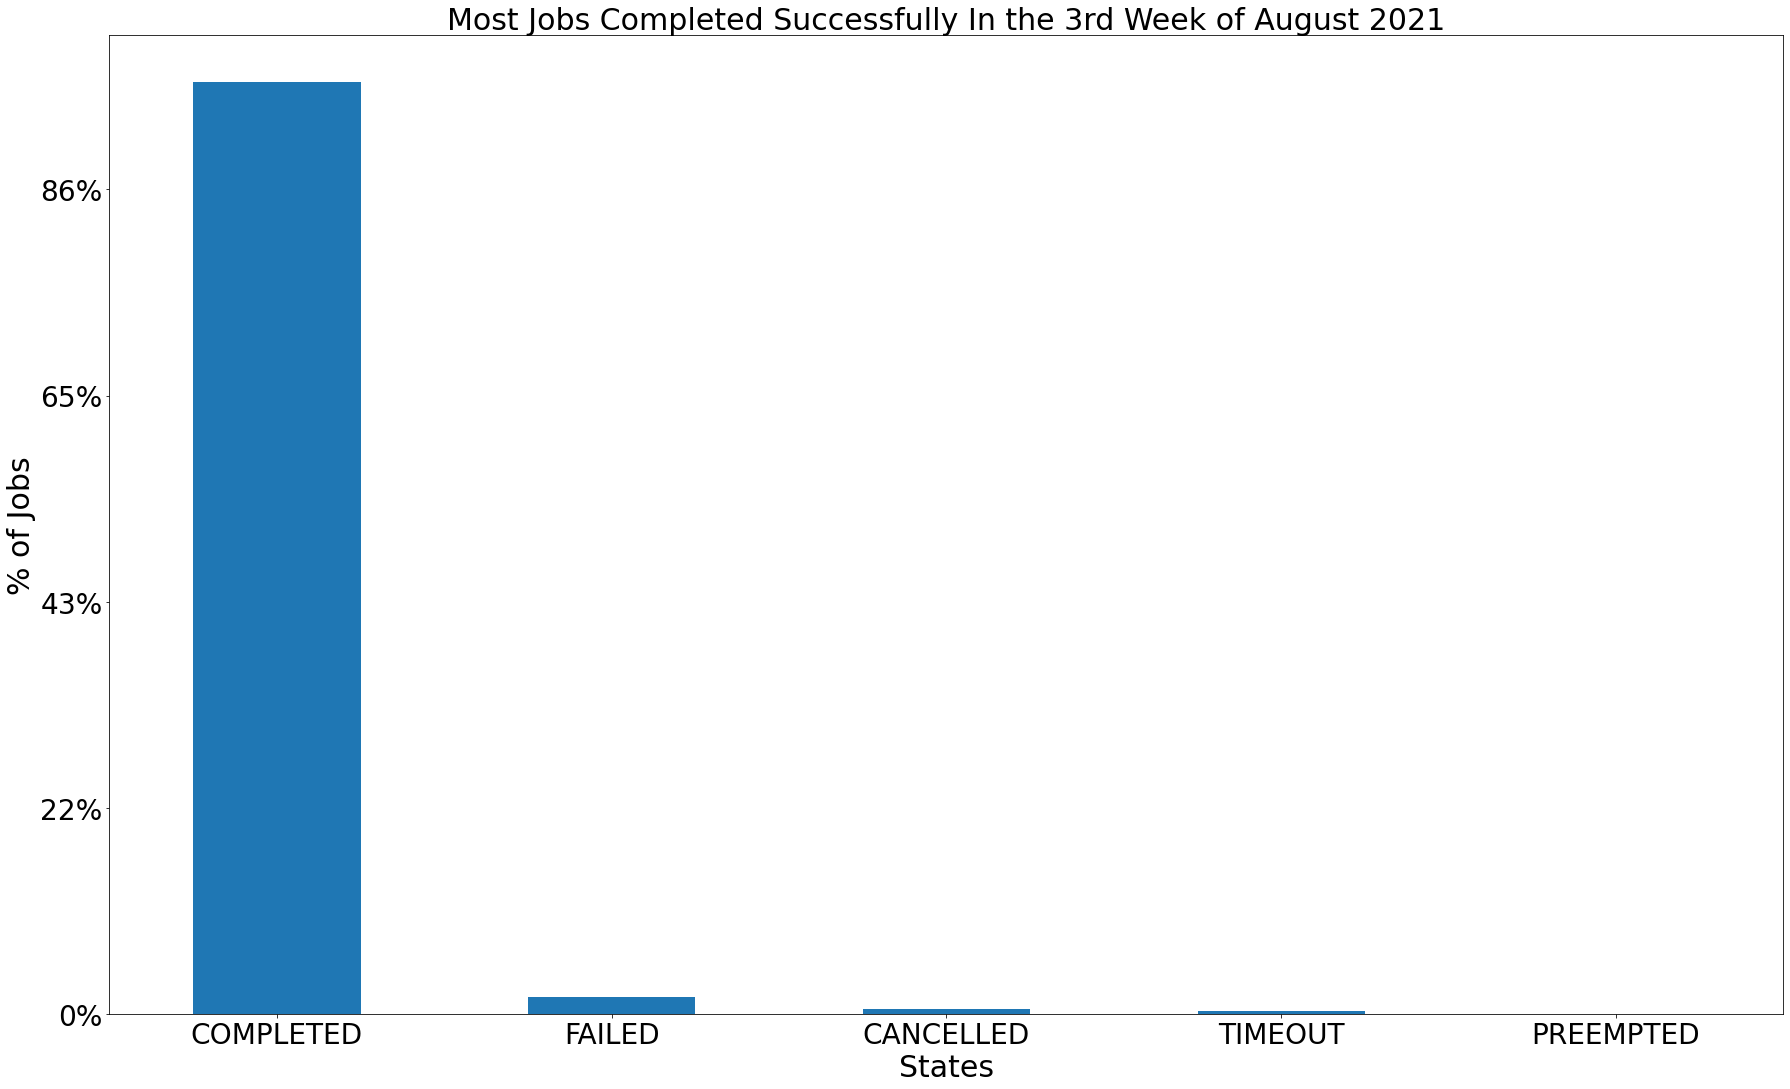

In [18]:
fig, ax = plt.subplots(figsize=(30, 18))
third_week_august_11_am['STATE'].value_counts().plot(kind='bar')

plt.xlabel('States', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)

plt.ylabel('% of Jobs', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title('Most Jobs Completed Successfully In the 3rd Week of August 2021', fontsize = fontsize)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(third_week_august_11_am['JOBID'].count()));

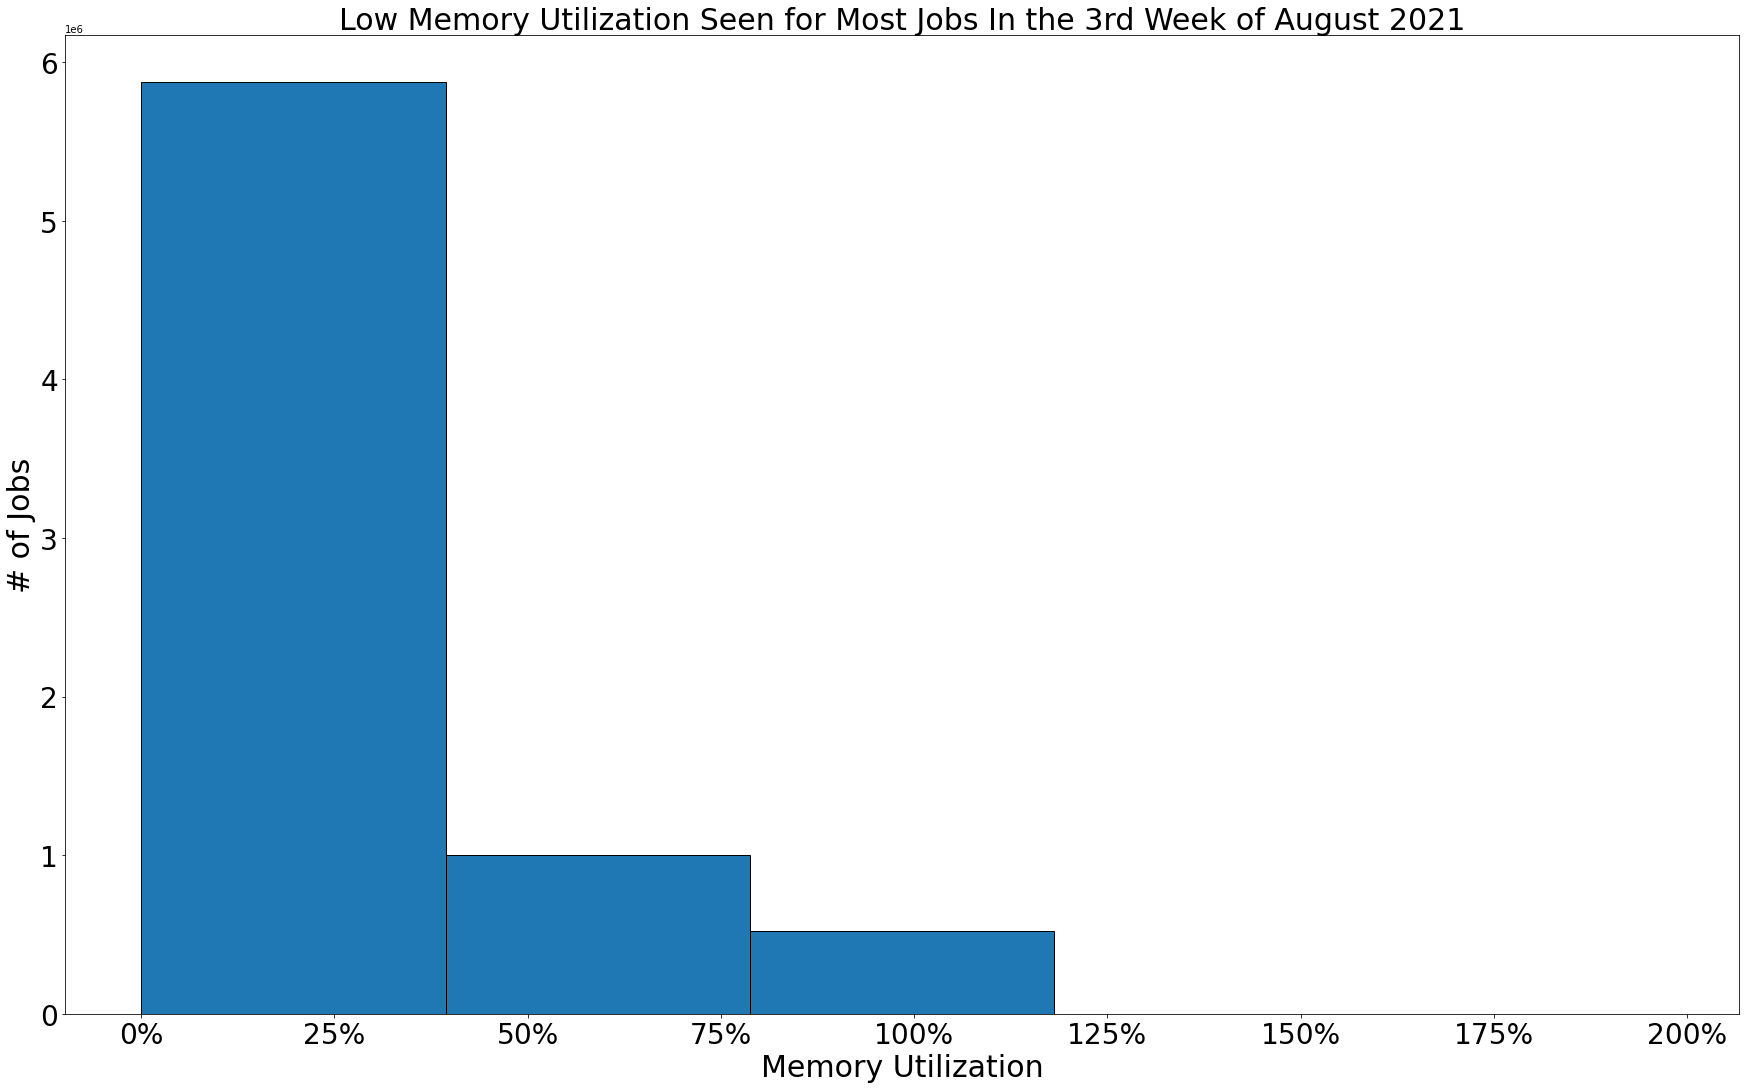

In [19]:
# Calculate memory utilization by dividing total memory used by total required memory
memory_utilization = jobs['USEDMEMTOT']/jobs['REQMEMTOT']

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
plt.hist(memory_utilization[memory_utilization < 2], bins=5, edgecolor='black')

# Set Axes labels and sizes
plt.xlabel('Memory Utilization', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('# of Jobs', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title("Low Memory Utilization Seen for Most Jobs In the 3rd Week of August 2021", fontsize = fontsize);

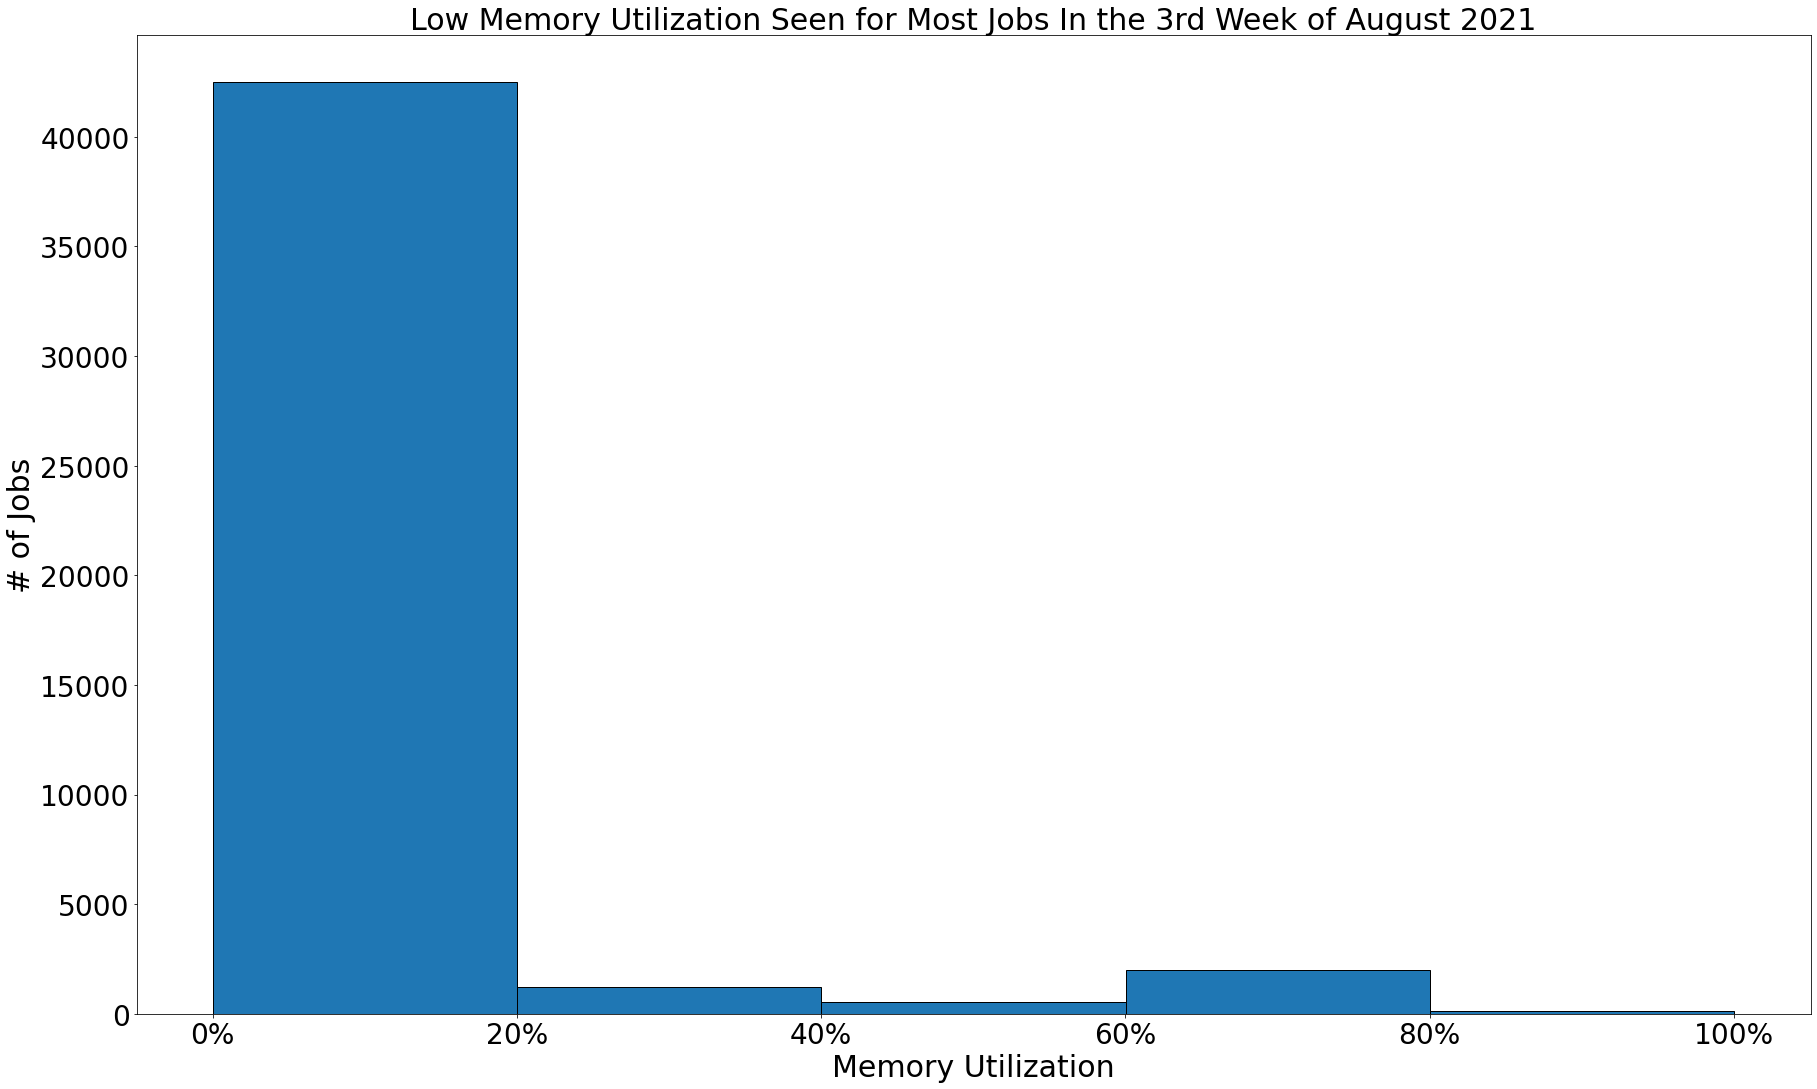

In [20]:
# Calculate memory utilization by dividing total memory used by total required memory
memory_utilization = third_week_august_11_am['USEDMEMTOT']/third_week_august_11_am['REQMEMTOT']

# Set figure size and graph plots
fig, ax = plt.subplots(figsize=(30, 18))
plt.hist(memory_utilization, bins=5, edgecolor='black')

# Set Axes labels and sizes
plt.xlabel('Memory Utilization', fontsize = fontsize)
plt.xticks(fontsize = fontsize - 2, rotation = 0)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('# of Jobs', fontsize = fontsize)
plt.yticks(fontsize = fontsize - 2)

plt.title("Low Memory Utilization Seen for Most Jobs In the 3rd Week of August 2021", fontsize = fontsize);